# OpenClaw: 开源AI Agent平台

**课程时长**: 0.5小时  
**课程目标**: 
- 了解OpenClaw是什么以及它的核心理念
- 掌握OpenClaw与其他AI框架的区别
- 理解开源AI Agent的发展趋势
- 动手体验OpenClaw的基本功能

---

## 目录

1. OpenClaw是什么
2. 发展历程与命名故事
3. GitHub Star趋势与社区热度
4. 核心特性
   - 4.1 主动式AI (Proactive Agent)
   - 4.2 多渠道接入
   - 4.3 Skills技能系统
   - 4.4 MCP协议集成
5. 记忆与持久化
   - 5.1 传统知识库 vs OpenClaw记忆
   - 5.2 双层记忆架构
   - 5.3 记忆检索
   - 5.4 会话压缩与记忆刷写
6. 架构设计
7. 与主流框架对比
8. 安全性考量
9. 动手体验
10. 总结与展望

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
rcParams['axes.unicode_minus'] = False

print("Environment setup complete!")

Environment setup complete!


## 1. OpenClaw是什么

**OpenClaw** 是一个开源的自主AI个人助手平台，运行在用户自己的设备上，通过已有的即时通讯渠道（WhatsApp、Telegram、Slack、Discord等）与用户交互。

### 一句话概括

> OpenClaw是一个运行在本地的AI Agent网关，让AI模型能够直接读写文件、运行脚本、控制浏览器，并且能**主动**为你执行任务。

### 核心定位

| 维度 | 传统AI助手 (ChatGPT等) | OpenClaw |
|------|----------------------|----------|
| **运行方式** | 云端服务 | 本地部署 |
| **交互模式** | 被动响应 | **主动执行** |
| **数据存储** | 服务商云端 | 用户本地 |
| **扩展性** | 受限于平台 | 自定义Skills |
| **模型绑定** | 绑定特定模型 | 模型无关 |
| **接入渠道** | 专用App/网页 | 任意IM渠道 |

### 关键概念

- **Gateway**: 本地网关进程，管理所有渠道连接和Agent会话
- **Pi**: OpenClaw的核心Agent引擎（由Armin Ronacher设计）
- **Skills**: 可扩展的技能模块系统
- **Channels**: 多渠道消息接入（WhatsApp、Telegram、Slack等）

## 2. 发展历程与命名故事

OpenClaw的发展经历了三次更名，背后是一段有趣的开源故事：

```
2025年11月  Clawdbot 发布
            ├── 创始人: Peter Steinberger (PSPDFKit创始人)
            ├── 最初只是一个"WhatsApp Relay"周末项目
            └── 迅速获得关注
               ↓
2025年12月  → Moltbot (第一次更名)
            ├── Anthropic商标请求
            ├── "Clawdbot"与"Claude"太相似
            └── 更名为Moltbot (Molty)
               ↓
2026年1月   → OpenClaw (第二次更名，最终命名)
            ├── 社区投票选择新名称
            ├── 吉祥物：龙虾 (Lobster) 🦞
            └── 口号: "The lobster way"
               ↓
2026年1月底  病毒式增长
            ├── 72小时突破 60,000 GitHub Stars
            ├── 一周内超过 100,000 Stars
            ├── 单日最高 +17,830 Stars (GitHub记录)
            ├── 一周 200万 网站访问
            └── Mac Mini M4 因此断货
```

### 为什么叫"OpenClaw"?

- **Open**: 开源精神
- **Claw**: 龙虾的钳子 (claw)，象征抓取和执行能力
- 龙虾是唯一已知能"返老还童"的生物，隐喻AI的自我进化能力

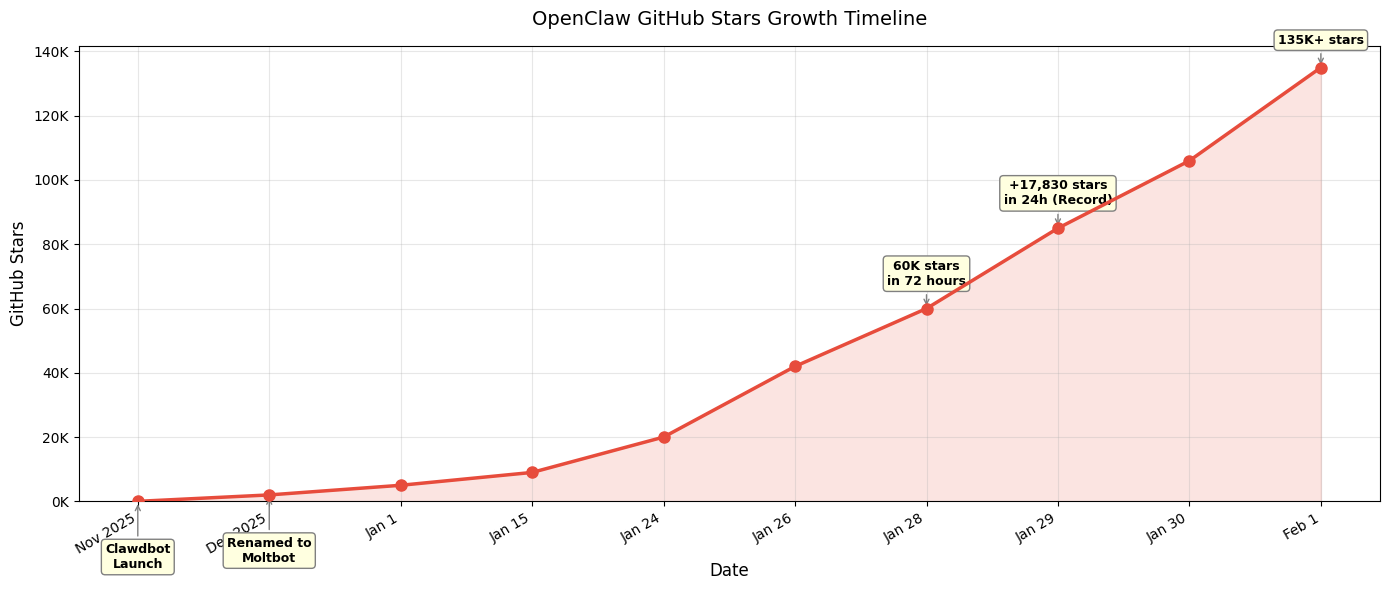

In [9]:
# OpenClaw GitHub Stars增长时间线
fig, ax = plt.subplots(figsize=(14, 6))

# 关键时间节点和Star数据
dates = ['Nov 2025', 'Dec 2025', 'Jan 1', 'Jan 15', 'Jan 24', 'Jan 26', 'Jan 28', 'Jan 29', 'Jan 30', 'Feb 1']
stars = [0, 2000, 5000, 9000, 20000, 42000, 60000, 85000, 106000, 135000]

ax.plot(dates, stars, 'o-', color='#E74C3C', linewidth=2.5, markersize=8, zorder=5)
ax.fill_between(range(len(dates)), stars, alpha=0.15, color='#E74C3C')

# 标注关键事件
events = {
    0: ('Clawdbot\nLaunch', -30),
    1: ('Renamed to\nMoltbot', -30),
    6: ('60K stars\nin 72 hours', 15),
    7: ('+17,830 stars\nin 24h (Record)', 15),
    9: ('135K+ stars', 15),
}

for idx, (text, offset) in events.items():
    ax.annotate(text, xy=(idx, stars[idx]),
                xytext=(0, offset), textcoords='offset points',
                ha='center', va='bottom' if offset > 0 else 'top',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', edgecolor='gray'),
                arrowprops=dict(arrowstyle='->', color='gray'))

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('GitHub Stars', fontsize=12)
ax.set_title('OpenClaw GitHub Stars Growth Timeline', fontsize=14, pad=15)
ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=0)

# 格式化Y轴
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

## 3. GitHub Star趋势与社区热度

OpenClaw的增长速度在GitHub历史上前所未有，下面与其他主流AI开源项目进行对比。

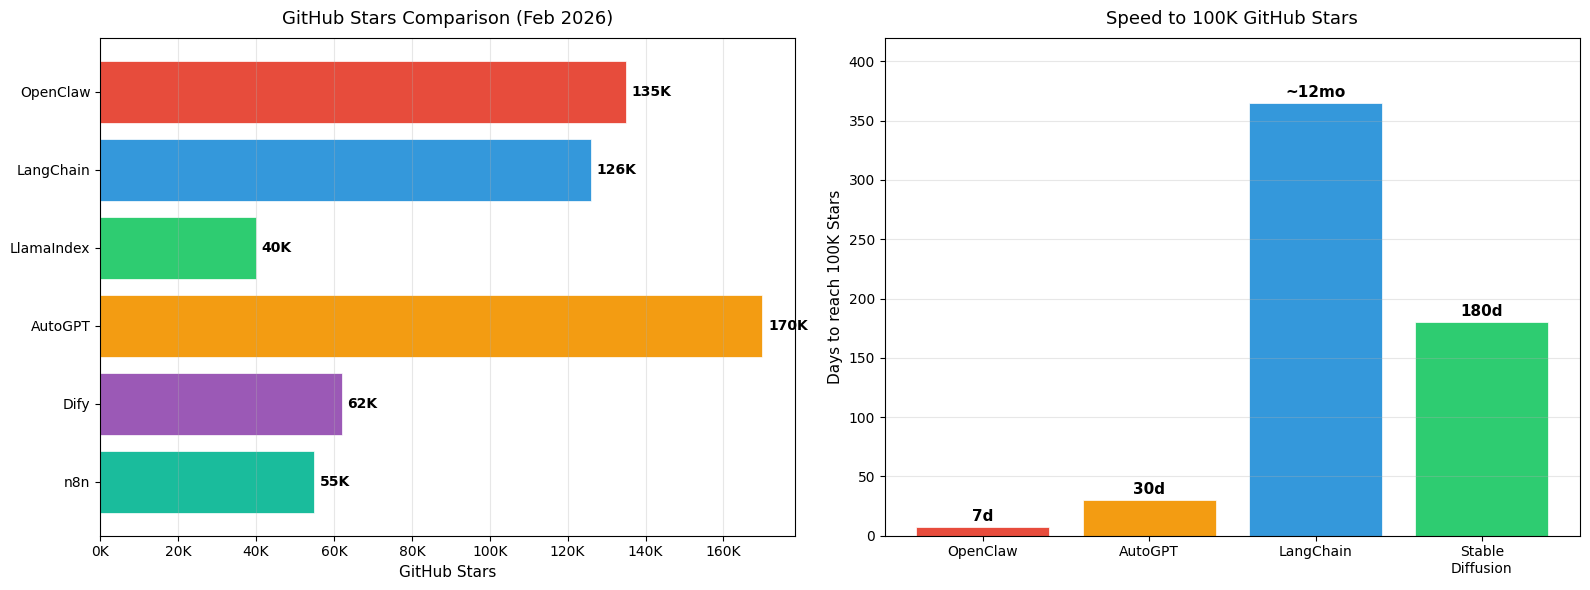

Note: Star counts are approximate as of Feb 2026


In [10]:
# GitHub Stars对比：OpenClaw vs 主流AI框架
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图: 当前Star数对比
projects = ['OpenClaw', 'LangChain', 'LlamaIndex', 'AutoGPT', 'Dify', 'n8n']
star_counts = [135000, 126000, 40000, 170000, 62000, 55000]
colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C']

bars = ax1.barh(projects, star_counts, color=colors, edgecolor='white', linewidth=0.5)
ax1.set_xlabel('GitHub Stars', fontsize=11)
ax1.set_title('GitHub Stars Comparison (Feb 2026)', fontsize=13, pad=10)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

for bar, count in zip(bars, star_counts):
    ax1.text(bar.get_width() + 1500, bar.get_y() + bar.get_height()/2,
             f'{count/1000:.0f}K', va='center', fontsize=10, fontweight='bold')

ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# 右图: 增长速度对比 (达到100K Stars所需时间)
projects_time = ['OpenClaw', 'AutoGPT', 'LangChain', 'Stable\nDiffusion']
days_to_100k = [7, 30, 365, 180]  # 大致天数
colors_time = ['#E74C3C', '#F39C12', '#3498DB', '#2ECC71']

bars2 = ax2.bar(projects_time, days_to_100k, color=colors_time, edgecolor='white', linewidth=0.5)
ax2.set_ylabel('Days to reach 100K Stars', fontsize=11)
ax2.set_title('Speed to 100K GitHub Stars', fontsize=13, pad=10)
ax2.grid(True, alpha=0.3, axis='y')

for bar, days in zip(bars2, days_to_100k):
    label = f'{days}d' if days < 365 else f'~{days//30}mo'
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             label, ha='center', fontsize=11, fontweight='bold')

ax2.set_ylim(0, max(days_to_100k) * 1.15)

plt.tight_layout()
plt.show()

print("Note: Star counts are approximate as of Feb 2026")

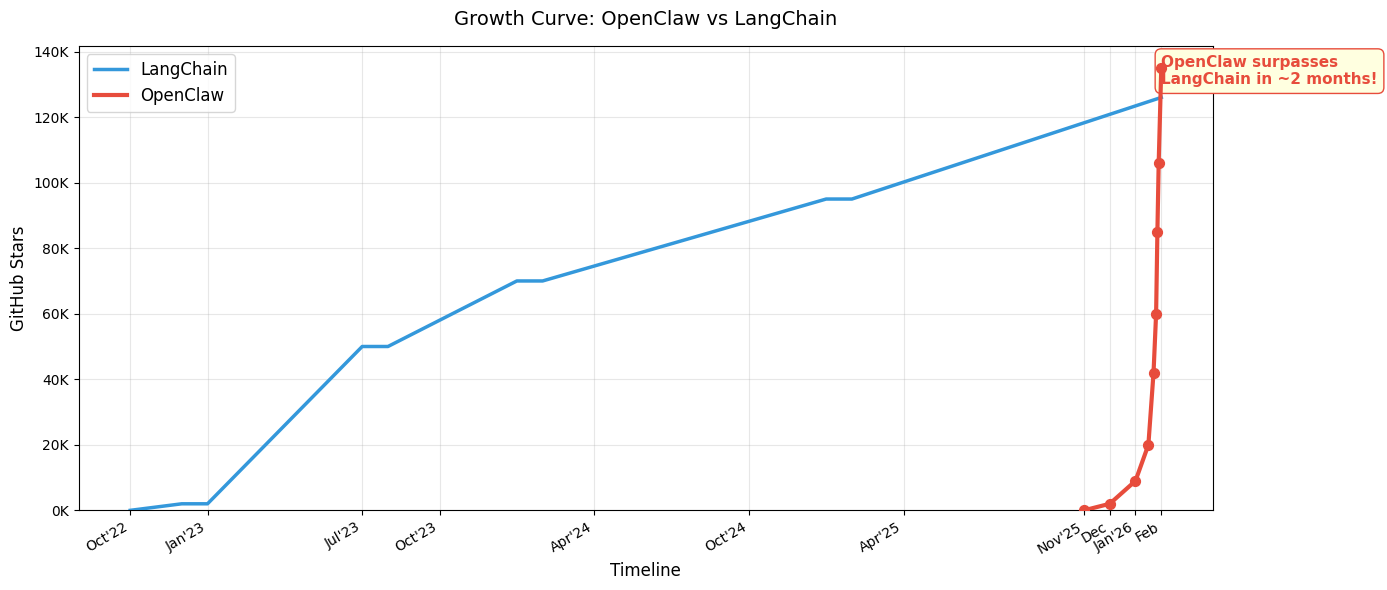

LangChain took ~3 years to reach 126K stars
OpenClaw reached 135K stars in ~2 months


In [11]:
# OpenClaw vs LangChain: 增长曲线对比
fig, ax = plt.subplots(figsize=(14, 6))

# LangChain增长曲线 (2022.10 - 2026.02, ~40个月)
lc_months = np.arange(0, 41)
# LangChain: 缓慢起步 -> 2023年快速增长 -> 2024-2025稳定增长
lc_stars = np.concatenate([
    np.linspace(0, 2000, 3),       # Oct-Dec 2022
    np.linspace(2000, 50000, 7),    # Jan-Jul 2023 (rapid)
    np.linspace(50000, 70000, 6),   # Aug 2023 - Jan 2024
    np.linspace(70000, 95000, 12),  # 2024
    np.linspace(95000, 126000, 13), # 2025 - Feb 2026
])

# OpenClaw增长曲线 (2025.11 - 2026.02, ~3个月)
oc_months_offset = 37  # OpenClaw从LangChain第37个月开始
oc_months = np.array([37, 38, 39, 39.5, 39.7, 39.8, 39.85, 39.9, 40])
oc_stars = np.array([0, 2000, 9000, 20000, 42000, 60000, 85000, 106000, 135000])

# 月份标签
month_labels = ['Oct\'22', '', '', 'Jan\'23', '', '', '', '', '', 'Oct\'23',
                '', '', 'Jan\'24', '', '', '', '', '', 'Jul\'24',
                '', '', '', '', '', 'Jan\'25', '', '', '', '', '',
                '', '', '', '', '', '', '', 'Nov\'25', 'Dec', 'Jan\'26', 'Feb']

ax.plot(lc_months, lc_stars, '-', color='#3498DB', linewidth=2.5, label='LangChain', zorder=3)
ax.plot(oc_months, oc_stars, '-', color='#E74C3C', linewidth=3, label='OpenClaw', zorder=4)
ax.scatter(oc_months, oc_stars, color='#E74C3C', s=50, zorder=5)

# 标注交叉点
ax.annotate('OpenClaw surpasses\nLangChain in ~2 months!',
            xy=(40, 130000), fontsize=11, fontweight='bold', color='#E74C3C',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', edgecolor='#E74C3C'))

ax.set_xlabel('Timeline', fontsize=12)
ax.set_ylabel('GitHub Stars', fontsize=12)
ax.set_title('Growth Curve: OpenClaw vs LangChain', fontsize=14, pad=15)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

# 设置X轴标签（只显示部分）
tick_positions = [0, 3, 9, 12, 18, 24, 30, 37, 38, 39, 40]
tick_labels = ['Oct\'22', 'Jan\'23', 'Jul\'23', 'Oct\'23', 'Apr\'24', 'Oct\'24', 'Apr\'25', 'Nov\'25', 'Dec', 'Jan\'26', 'Feb']
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=30, ha='right')

ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

print("LangChain took ~3 years to reach 126K stars")
print("OpenClaw reached 135K stars in ~2 months")

### 社区热度指标

| 指标 | OpenClaw | LangChain |
|------|----------|----------|
| **GitHub Stars** | ~135K (2个月) | ~126K (3年+) |
| **Forks** | ~20K | ~21K |
| **Contributors** | 快速增长中 | 3000+ |
| **NPM周下载** | 高速增长 | N/A (Python) |
| **许可证** | MIT | MIT |

#### 媒体报道

OpenClaw在短短一周内引发了大量主流科技媒体报道：
- **TechCrunch**: AI助手开始构建自己的社交网络
- **VentureBeat**: OpenClaw证明Agent AI可行，但也暴露安全风险
- **Fast Company**: OpenClaw很酷，但成本不低
- **Dark Reading**: OpenClaw AI在企业环境中的安全隐患

## 4. 核心特性

### 4.1 主动式AI (Proactive Agent)

OpenClaw最大的差异化特性是**主动性** (Proactivity)。

```
传统AI（如ChatGPT）:
  用户提问 → AI回答 → 等待下一个问题
  (被动响应模式)

OpenClaw:
  用户设定目标 → AI主动规划 → 自主执行 → 持续监控 → 主动汇报
  (主动代理模式)
```

#### 主动执行示例

- **定时任务 (Cron)**: 每天早上自动汇总邮件摘要
- **Webhook触发**: 代码仓库有新PR时自动进行Code Review
- **自主改进**: 遇到无法完成的任务时，自动编写新的Skill来解决

### 4.2 多渠道接入

```
                    ┌─── WhatsApp
                    ├─── Telegram
                    ├─── Slack
                    ├─── Discord
  OpenClaw Gateway ─┼─── Microsoft Teams
                    ├─── Google Chat
                    ├─── Signal
                    ├─── iMessage
                    ├─── Matrix
                    └─── WebChat
```

OpenClaw不需要专门的App或网页界面，它直接接入你已经在用的聊天工具。

### 4.3 Skills技能系统

Skills是OpenClaw的可扩展能力模块：

```
Skills结构:
  skills/
  └── my-skill/
      └── SKILL.md          # YAML frontmatter + 指令

加载优先级:
  1. Workspace skills (项目级) ← 最高
  2. ~/.openclaw/skills (用户级)
  3. Bundled skills (内置)    ← 最低

特性:
  - Agent启动时快照加载
  - 可通过ClawHub远程搜索和安装
  - Agent可以自主编写新Skill
```

#### 热门Skills

- **Browser**: 浏览器控制，自动填表、爬数据
- **GitHub**: PR审查、Issue管理、CI/CD触发
- **Home Assistant**: 智能家居控制
- **Health**: 可穿戴设备数据读取
- **Canvas**: Agent驱动的可视化工作空间

### 4.4 MCP协议集成

OpenClaw通过**Model Context Protocol (MCP)** 连接100+第三方服务：

```
OpenClaw Gateway
    │
    ├── mcporter (MCP桥接层)
    │   ├── Notion
    │   ├── Linear
    │   ├── Stripe
    │   ├── Gmail
    │   └── 100+ services...
    │
    └── Native Tools
        ├── Browser Control
        ├── File System
        ├── Script Execution
        └── Cron Jobs
```

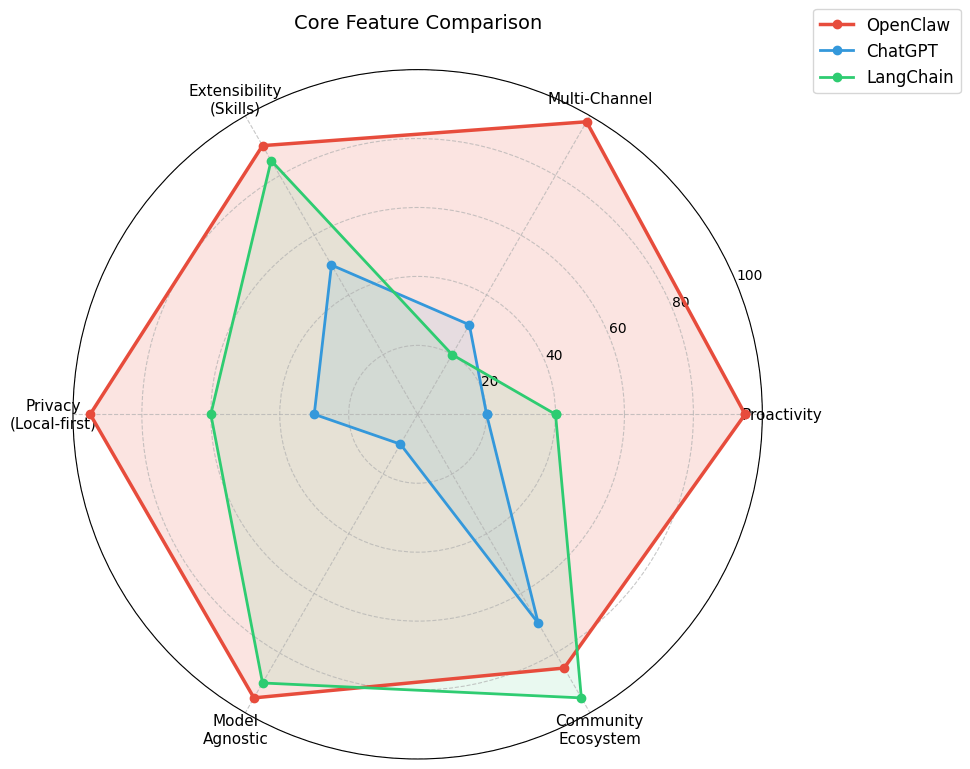

Note: Ratings are subjective comparisons for presentation purposes


In [12]:
# OpenClaw核心特性雷达图
categories = ['Proactivity', 'Multi-Channel', 'Extensibility\n(Skills)', 'Privacy\n(Local-first)',
              'Model\nAgnostic', 'Community\nEcosystem']
num_vars = len(categories)

# 对比评分 (0-100)
openclaw_scores = [95, 98, 90, 95, 95, 85]
chatgpt_scores =  [20, 30, 50, 30, 10, 70]
langchain_scores = [40, 20, 85, 60, 90, 95]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

openclaw_scores += openclaw_scores[:1]
chatgpt_scores += chatgpt_scores[:1]
langchain_scores += langchain_scores[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

ax.plot(angles, openclaw_scores, 'o-', linewidth=2.5, label='OpenClaw', color='#E74C3C')
ax.fill(angles, openclaw_scores, alpha=0.15, color='#E74C3C')

ax.plot(angles, chatgpt_scores, 'o-', linewidth=2, label='ChatGPT', color='#3498DB')
ax.fill(angles, chatgpt_scores, alpha=0.1, color='#3498DB')

ax.plot(angles, langchain_scores, 'o-', linewidth=2, label='LangChain', color='#2ECC71')
ax.fill(angles, langchain_scores, alpha=0.1, color='#2ECC71')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.grid(True, linestyle='--', alpha=0.7)

ax.set_title('Core Feature Comparison', fontsize=14, pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

plt.tight_layout()
plt.show()

print("Note: Ratings are subjective comparisons for presentation purposes")

## 5. 记忆与持久化

OpenClaw的记忆系统是它区别于传统AI工具的另一个核心特性。与需要开发者预先构建知识库的传统方案不同，OpenClaw的记忆是**自然生长**的——在与用户的交互过程中自动积累和进化。

### 5.1 传统知识库 vs OpenClaw记忆

```
传统知识库方案 (如RAG):
  开发者收集文档 → 切分chunk → 向量化 → 存入向量数据库 → 用户查询 → 检索
  
  特点:
  ├── 需要开发者预先准备数据
  ├── 知识是静态的，更新需要重新处理
  ├── 用户无法自然地"教"系统新知识
  └── 适合结构化、已知的知识领域

OpenClaw记忆:
  用户交互 → Agent自动记录 → 持久化到本地文件 → 下次会话自动加载
  
  特点:
  ├── 无需预先准备，记忆随使用自然积累
  ├── 用户可以随时说"记住这个"来主动写入
  ├── Agent自己也会判断哪些信息值得记住
  └── 知识随时间持续进化
```

| 维度 | 传统知识库 (RAG) | OpenClaw记忆 |
|------|-----------------|-------------|
| **创建者** | 开发者预先构建 | Agent + 用户自然积累 |
| **数据格式** | 向量数据库 | 纯Markdown文件 |
| **更新方式** | 重新处理文档 | 实时追加写入 |
| **个性化** | 通用知识 | 高度个人化 |
| **可读性** | 向量不可读 | 纯文本，人可直接阅读编辑 |
| **存储位置** | 通常在云端 | 本地磁盘 |
| **适用场景** | 企业知识问答 | 个人助手记忆 |

### 5.2 双层记忆架构

OpenClaw使用纯Markdown文件作为记忆的存储介质，分为两层：

```
~/.openclaw/workspace/
├── MEMORY.md                    ← 长期记忆（核心）
│   ├── 用户偏好: "喜欢深色模式"
│   ├── 重要决策: "项目用React而非Vue"
│   ├── 关键事实: "服务器IP是192.168.1.100"
│   └── 持久规则: "代码风格用4空格缩进"
│
└── memory/                      ← 每日记忆
    ├── 2026-01-30.md           ← 昨天的上下文
    ├── 2026-01-31.md           ← 今天的上下文
    │   ├── 上午讨论了API设计
    │   ├── 下午修复了3个Bug
    │   └── 晚上部署了v2.1
    └── ...
```

#### 工作原理

```
会话开始时:
  1. 读取 MEMORY.md (长期记忆)
  2. 读取今天的 memory/YYYY-MM-DD.md
  3. 读取昨天的 memory/YYYY-MM-DD.md
  → Agent已经"记得"你的偏好和近期上下文

会话进行中:
  用户: "记住，我们的数据库密码改成了新的"
  Agent: [写入 MEMORY.md]
  
  用户: "今天完成了用户模块的重构"
  Agent: [追加到 memory/2026-01-31.md]

会话结束时:
  Agent自动将重要信息写入记忆文件
```

#### 设计哲学

> **文件就是真相源 (Files are the source of truth)**  
> 模型只"记得"写入磁盘的内容。这意味着：
> - 用户可以直接编辑Markdown文件来修改记忆
> - 记忆完全可审计、可备份
> - 不依赖任何数据库或云服务

### 5.3 记忆检索

当记忆量增长后，OpenClaw需要高效地找到相关信息：

```
记忆检索系统:

  查询 "上周讨论的API设计方案"
    │
    ├── BM25关键词检索
    │   └── 基于关键词匹配的传统搜索
    │
    └── 向量语义检索
        └── 基于语义相似度的模糊匹配
    │
    ▼
  混合排序 → 返回最相关的记忆片段
```

#### 索引存储

- 每个Agent独立的SQLite数据库: `~/.openclaw/memory/<agentId>.sqlite`
- 文件监控: 当`MEMORY.md`或`memory/`目录变化时，自动标记索引为脏数据（1.5秒防抖）
- 异步同步: 索引在会话启动、搜索时或定时间隔异步更新

### 5.4 会话压缩与记忆刷写

LLM的上下文窗口是有限的。当对话接近上下文上限时，OpenClaw有一套巧妙的机制来保证重要信息不丢失：

```
上下文窗口使用情况:

[████████████████████████████░░░░] 80% - 正常对话
[████████████████████████████████] 95% - 接近上限
                                         │
                                         ▼
                              触发"记忆刷写" (Memory Flush)
                                         │
                              Agent自动执行一次静默turn:
                              "将重要信息写入MEMORY.md"
                                         │
                                         ▼
                              上下文压缩 (Compaction)
                              保留关键信息，释放空间
                              [████████░░░░░░░░░░░░░░░░░░░░░░] 25%
```

#### 刷写触发条件

- **软阈值**: token估计超过 `contextWindow - reserveTokensFloor - softThresholdTokens`
- **每压缩周期一次**: 通过`sessions.json`跟踪，避免重复刷写
- **需要可写工作区**: 沙箱模式(`workspaceAccess: "ro"`)下跳过

### 5.5 社区记忆扩展

OpenClaw的记忆系统也吸引了社区开发者构建增强插件：

| 项目 | 功能 | 特点 |
|------|------|------|
| **Supermemory** | 云端增强记忆 | 自动记忆对话，完美回忆，云端存储 |
| **MoltBrain** | 项目上下文记忆 | 自动学习项目上下文，跨Agent共享 |
| **MemU** | 智能预测记忆 | 提取洞察，预测用户意图，92%准确率 |

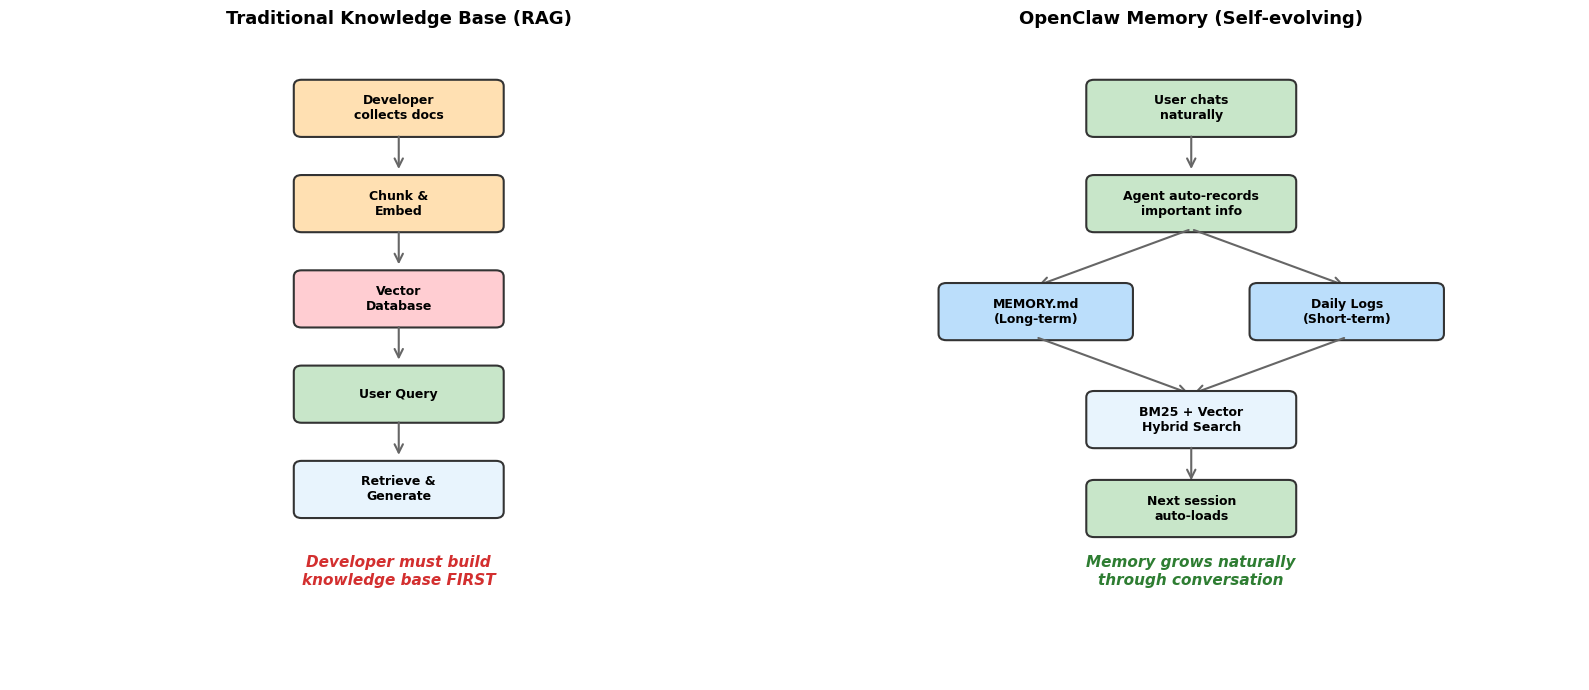

In [13]:
# 传统知识库 vs OpenClaw记忆 对比图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# 左图: 传统知识库工作流
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')
ax1.set_title('Traditional Knowledge Base (RAG)', fontsize=13, pad=15, fontweight='bold')

from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

def add_box(ax, x, y, text, color='#E8F4FD', width=2.2, height=0.7):
    box = FancyBboxPatch((x-width/2, y-height/2), width, height,
                         boxstyle="round,pad=0.1",
                         edgecolor='#333', facecolor=color, linewidth=1.5)
    ax.add_patch(box)
    ax.text(x, y, text, ha='center', va='center', fontsize=9, fontweight='bold')

def add_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch((x1, y1), (x2, y2),
                           arrowstyle='->', mutation_scale=15,
                           linewidth=1.5, color='#666')
    ax.add_patch(arrow)

# 传统流程
add_box(ax1, 5, 9, 'Developer\ncollects docs', '#FFE0B2', width=2.5)
add_arrow(ax1, 5, 8.6, 5, 8)
add_box(ax1, 5, 7.5, 'Chunk &\nEmbed', '#FFE0B2', width=2.5)
add_arrow(ax1, 5, 7.1, 5, 6.5)
add_box(ax1, 5, 6, 'Vector\nDatabase', '#FFCDD2', width=2.5)
add_arrow(ax1, 5, 5.6, 5, 5)
add_box(ax1, 5, 4.5, 'User Query', '#C8E6C9', width=2.5)
add_arrow(ax1, 5, 4.1, 5, 3.5)
add_box(ax1, 5, 3, 'Retrieve &\nGenerate', '#E8F4FD', width=2.5)

ax1.text(5, 1.5, 'Developer must build\nknowledge base FIRST', ha='center',
         fontsize=11, color='#D32F2F', fontweight='bold', style='italic')

# 右图: OpenClaw记忆流
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.axis('off')
ax2.set_title('OpenClaw Memory (Self-evolving)', fontsize=13, pad=15, fontweight='bold')

add_box(ax2, 5, 9, 'User chats\nnaturally', '#C8E6C9', width=2.5)
add_arrow(ax2, 5, 8.6, 5, 8)
add_box(ax2, 5, 7.5, 'Agent auto-records\nimportant info', '#C8E6C9', width=2.5)
add_arrow(ax2, 5, 7.1, 3, 6.2)
add_arrow(ax2, 5, 7.1, 7, 6.2)

add_box(ax2, 3, 5.8, 'MEMORY.md\n(Long-term)', '#BBDEFB', width=2.3)
add_box(ax2, 7, 5.8, 'Daily Logs\n(Short-term)', '#BBDEFB', width=2.3)

add_arrow(ax2, 3, 5.4, 5, 4.5)
add_arrow(ax2, 7, 5.4, 5, 4.5)

add_box(ax2, 5, 4.1, 'BM25 + Vector\nHybrid Search', '#E8F4FD', width=2.5)
add_arrow(ax2, 5, 3.7, 5, 3.1)
add_box(ax2, 5, 2.7, 'Next session\nauto-loads', '#C8E6C9', width=2.5)

ax2.text(5, 1.5, 'Memory grows naturally\nthrough conversation', ha='center',
         fontsize=11, color='#2E7D32', fontweight='bold', style='italic')

plt.tight_layout()
plt.show()

## 6. 架构设计

### 6.1 整体架构

```
┌─────────────────────────────────────────────────────────┐
│                    OpenClaw Gateway                      │
│              (长时运行的本地进程)                          │
│                                                         │
│  ┌──────────┐  ┌──────────┐  ┌──────────┐              │
│  │ Channel  │  │ Channel  │  │ Channel  │  ...          │
│  │ WhatsApp │  │ Telegram │  │  Slack   │              │
│  └────┬─────┘  └────┬─────┘  └────┬─────┘              │
│       │              │              │                    │
│       └──────────┬───┴──────────────┘                    │
│                  │                                       │
│           ┌──────▼──────┐                                │
│           │  Router &   │                                │
│           │  Session Mgr│                                │
│           └──────┬──────┘                                │
│                  │                                       │
│           ┌──────▼──────┐     ┌──────────────┐          │
│           │  Pi Agent   │────▶│  LLM Provider │          │
│           │  (Core AI)  │     │  (Any model)  │          │
│           └──────┬──────┘     └──────────────┘          │
│                  │                                       │
│    ┌─────────────┼─────────────┐                        │
│    │             │             │                        │
│  ┌─▼──┐    ┌─────▼───┐   ┌────▼────┐                   │
│  │Skills│   │ mcporter │   │ Native  │                   │
│  │System│   │  (MCP)   │   │ Tools   │                   │
│  └─────┘   └─────────┘   └─────────┘                   │
│                                                         │
│  ┌──────────────────────────────────┐                   │
│  │  Control UI (WebSocket)           │                   │
│  │  CLI / WebChat / macOS / Mobile   │                   │
│  └──────────────────────────────────┘                   │
└─────────────────────────────────────────────────────────┘
```

### 6.2 模型无关设计

OpenClaw不绑定任何特定AI模型，支持：

| Provider | 模型示例 | 协议 |
|----------|---------|------|
| **OpenAI** | GPT-4o, o1 | OpenAI API |
| **Anthropic** | Claude 3.5 Sonnet | Anthropic API |
| **Google** | Gemini 1.5 Pro | Google AI API |
| **Ollama** | Qwen3, LLaMA 3 | OpenAI-compatible |
| **自定义** | 任何OpenAI兼容API | OpenAI-compatible |

### 6.3 安全沙箱

```
用户请求 → 权限检查 → 沙箱执行 → 结果返回
                │
                ├── 文件系统访问控制
                ├── 网络请求白名单
                ├── 脚本执行超时
                └── 敏感操作确认
```

## 7. 与主流框架对比

### 7.1 定位对比

| 项目 | 类型 | 核心理念 | 目标用户 |
|------|------|---------|----------|
| **OpenClaw** | AI Agent平台 | 本地运行的主动式个人AI助手 | 个人用户、开发者 |
| **LangChain** | AI应用框架 | LLM应用开发工具链 | 开发者 |
| **AutoGPT** | 自主Agent | 自动化GPT任务执行 | 技术尝鲜者 |
| **Dify** | LLMOps平台 | 低代码AI应用构建 | 企业用户 |
| **n8n** | 工作流自动化 | 可视化工作流+AI节点 | 运营、非技术用户 |
| **Claude Code** | 编码助手 | 终端AI编程代理 | 开发者 |

### 7.2 技术维度对比

| 维度 | OpenClaw | LangChain | AutoGPT | Dify |
|------|----------|-----------|---------|------|
| **语言** | TypeScript | Python | Python | Python+TS |
| **运行方式** | 本地 Gateway | 库引用 | 本地/云端 | 云端/自部署 |
| **主动性** | 原生支持 | 需自建 | 有限 | Workflow |
| **多渠道** | 原生15+渠道 | 无 | 无 | API/Web |
| **MCP** | mcporter | 有集成 | 无 | 有集成 |
| **Skills** | 原生系统 | Chains/Agents | Plugins | Workflow |
| **模型支持** | 任意 | 任意 | 主要OpenAI | 多种 |
| **易用性** | CLI安装 | 需编程 | CLI | Web UI |
| **许可证** | MIT | MIT | MIT | Apache 2.0 |

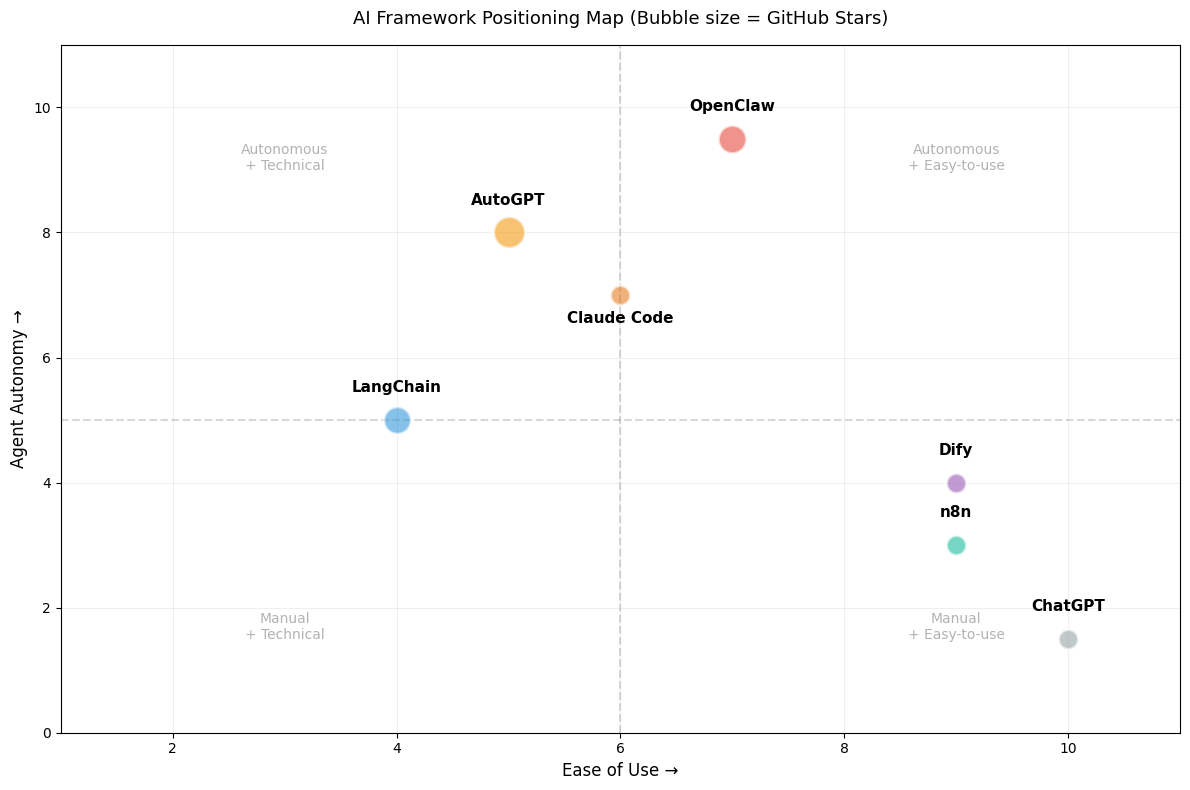

In [14]:
# 框架定位象限图
fig, ax = plt.subplots(figsize=(12, 8))

# 坐标: (易用性, 自主性)
frameworks = {
    'OpenClaw':    (7, 9.5, '#E74C3C', 135),
    'LangChain':   (4, 5, '#3498DB', 126),
    'AutoGPT':     (5, 8, '#F39C12', 170),
    'Dify':        (9, 4, '#9B59B6', 62),
    'n8n':         (9, 3, '#1ABC9C', 55),
    'Claude Code': (6, 7, '#E67E22', 30),
    'ChatGPT':     (10, 1.5, '#95A5A6', 0),
}

for name, (x, y, color, stars) in frameworks.items():
    size = max(stars * 3, 200)
    ax.scatter(x, y, s=size, c=color, alpha=0.6, edgecolors='white', linewidth=2, zorder=3)
    offset_y = 0.4 if name != 'Claude Code' else -0.5
    ax.annotate(name, (x, y), textcoords="offset points",
                xytext=(0, 20 if offset_y > 0 else -20),
                ha='center', fontsize=11, fontweight='bold')

# 象限标签
ax.axhline(y=5, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=6, color='gray', linestyle='--', alpha=0.3)

ax.text(3, 9, 'Autonomous\n+ Technical', ha='center', fontsize=10, color='gray', alpha=0.6)
ax.text(9, 9, 'Autonomous\n+ Easy-to-use', ha='center', fontsize=10, color='gray', alpha=0.6)
ax.text(3, 1.5, 'Manual\n+ Technical', ha='center', fontsize=10, color='gray', alpha=0.6)
ax.text(9, 1.5, 'Manual\n+ Easy-to-use', ha='center', fontsize=10, color='gray', alpha=0.6)

ax.set_xlabel('Ease of Use →', fontsize=12)
ax.set_ylabel('Agent Autonomy →', fontsize=12)
ax.set_title('AI Framework Positioning Map (Bubble size = GitHub Stars)', fontsize=13, pad=15)
ax.set_xlim(1, 11)
ax.set_ylim(0, 11)
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

## 8. 安全性考量

OpenClaw的快速增长也引发了安全方面的讨论。给AI Agent完全的系统访问权限，是AI领域最需要谨慎对待的事情之一。

### 8.1 主要风险

| 风险类别 | 具体风险 | 严重程度 |
|---------|---------|----------|
| **Prompt Injection** | 恶意输入导致Agent执行非预期操作 | 高 |
| **凭证泄露** | API Key等敏感信息存储在本地配置文件 | 高 |
| **权限过大** | Agent拥有文件系统、网络、脚本执行权限 | 中 |
| **供应链攻击** | 恶意MCP模块或Skill可能执行任意代码 | 中 |
| **管理界面暴露** | Gateway控制UI默认可能对外可访问 | 中 |
| **记忆文件泄露** | MEMORY.md等纯文本记忆文件可被恶意软件读取 | 中 |

### 8.2 安全建议

```
最佳实践:

1. 隔离环境
   ├── 在Docker容器或虚拟机中运行
   ├── 限制网络访问范围
   └── 不连接生产系统

2. 凭证管理
   ├── 使用环境变量而非配置文件
   ├── 定期轮换API Key
   └── 最小权限原则

3. 审计与监控
   ├── 启用操作日志
   ├── 审查Skill来源
   └── 监控异常行为

4. 网络安全
   ├── Gateway绑定localhost
   ├── 启用Token认证
   └── 使用TLS加密
```

### 8.3 我们的部署方案

在本工作坊中，我们采用了以下安全措施：

- **Docker隔离**: 每个用户运行在独立容器中
- **Token认证**: Gateway访问需要随机生成的Token
- **局域网绑定**: Gateway绑定到`lan`，仅允许局域网访问
- **独立端口**: 每个用户分配独立的Host端口
- **持久化存储**: 配置和Token存储在Docker Volume中，重启不丢失

## 9. 动手体验

### 9.1 访问OpenClaw

你的OpenClaw实例已经在容器中运行。查看 **getting-started.md** 文件获取连接信息：

1. 打开 JupyterLab 文件浏览器
2. 双击 `getting-started.md` 查看你的专属连接地址和Token
3. 在浏览器中访问OpenClaw控制台

### 9.2 基本对话

通过WebChat与OpenClaw交互：

```
你: 你好，你是谁？
AI: 我是你的个人AI助手，运行在OpenClaw平台上...

你: 帮我查看当前目录有哪些文件
AI: [执行ls命令，返回文件列表]

你: 帮我写一个Python脚本计算斐波那契数列
AI: [创建文件并执行]
```

### 9.3 体验Skills

试试让OpenClaw使用它的内置工具：

- **文件操作**: "创建一个名为hello.py的文件，内容打印Hello World"
- **浏览器**: "帮我打开百度搜索'OpenClaw'"
- **代码执行**: "运行刚才创建的hello.py"

### 9.4 体验记忆功能

试试OpenClaw的记忆持久化：

```
你: 记住，我的名字是小明，我是一名Python开发者
AI: [写入MEMORY.md]

你: 我喜欢用vim编辑器，代码缩进用4个空格
AI: [写入MEMORY.md]

# 关闭会话，重新开始新会话

你: 你还记得我是谁吗？
AI: 你是小明，一名Python开发者，喜欢用vim...
```

### 9.5 配置说明

你的OpenClaw配置文件位于 `~/.openclaw/openclaw.json`：

```json
{
  "gateway": {
    "mode": "local",
    "bind": "lan",
    "port": 18789
  },
  "models": {
    "providers": {
      "ollama": { "baseUrl": "...", "models": ["qwen3:0.6b"] },
      "huawei": { "baseUrl": "...", "models": ["qwen3-32b", "deepseek-r1-0528"] }
    }
  }
}
```

当前配置使用华为云API的Qwen3-32B作为默认模型。

## 10. 总结与展望

### 10.1 核心要点

- **OpenClaw是什么**: 开源、本地运行的主动式AI Agent平台
- **为什么火**: 解决了AI助手"被动等待"的痛点，让AI真正成为24/7工作的个人助手
- **核心优势**: 主动执行、多渠道接入、模型无关、可扩展Skills、隐私优先
- **记忆系统**: 双层Markdown记忆，自然积累，无需预建知识库
- **增长速度**: 2个月135K Stars，GitHub史上增长最快的项目之一
- **安全注意**: 需要在隔离环境中运行，注意凭证管理和权限控制

### 10.2 AI Agent发展趋势

```
2023: ChatGPT时代
  └── 人问AI答，被动模式
        ↓
2024: Agent初探
  └── AutoGPT, LangChain Agents
  └── 概念验证阶段
        ↓
2025-2026: Agent落地
  └── OpenClaw: 个人AI助手
  └── Claude Code: AI编程代理
  └── 从"能用"到"好用"
        ↓
未来: Agent生态
  └── Agent之间协作 (Moltbook)
  └── 专业领域Agent
  └── 企业级Agent编排
```

### 10.3 延伸阅读

- [OpenClaw官方文档](https://docs.openclaw.ai/)
- [OpenClaw GitHub](https://github.com/openclaw/openclaw)
- [Pi: The Minimal Agent Within OpenClaw](https://lucumr.pocoo.org/2026/1/31/pi/) (Armin Ronacher)
- [OpenClaw Memory文档](https://docs.openclaw.ai/concepts/memory)
- [OpenClaw Skills集合](https://github.com/VoltAgent/awesome-openclaw-skills)

---

**课后思考**

1. 主动式AI Agent和传统被动式AI助手的根本区别是什么？这对用户体验意味着什么？

2. 给AI Agent完全的系统访问权限带来了哪些安全挑战？如何在功能性和安全性之间取得平衡？

3. OpenClaw的"自主编写Skill"能力意味着什么？这是否接近AGI的某些特征？

4. OpenClaw的记忆系统使用纯Markdown文件而非数据库，这种设计有什么优缺点？与传统RAG方案相比，各适合什么场景？

5. 如果你要将OpenClaw部署到企业环境中，需要考虑哪些额外的安全措施？

---

**动手练习**: 尝试在你的OpenClaw实例中完成以下任务：
- 让AI创建并运行一个Python脚本
- 让AI帮你管理文件（创建、移动、删除）
- 测试记忆功能：告诉AI一些偏好，重启会话后验证它是否记住
- 探索OpenClaw的内置Skills列表